In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [3]:
# Set up file paths
os.chdir('/Users/nsusser/Desktop/Github/happyDB/')
# Load data 
input_path = 'analysis_data/results - factors.csv'
results = pd.read_csv(input_path)

In [4]:
# Create a mapping from Factor_# to human-readable names
factor_label_map = {
    "Factor_1": "Positive Emotions",
    "Factor_2": "Meaning and Mastery",
    "Factor_3": "Negative attitudes toward life",
    "Factor_4": "Close and Deep Relationships",
    "Factor_5": "Prosocial Behavior-Empathy for suffering",
    "Factor_6": "Engagement",
    "Factor_7": "Health",
    "Factor_8": "Autonomy",
    "Factor_9": "Vitality",
    "Factor_10": "Community & Belonging",
    "Factor_11": "Learning and Growth",
    "Factor_12": "Negative Emotions",
    "Factor_13": "Emotional Stability",
    "Factor_14": "Loneliness/Independence",
    "Factor_15": "Supportive Relationships",
    "Factor_16": "Autonomy-Engagement",
    "Factor_17": "Life Satisfaction",
    "Factor_18": "Trusting and Respectfully Relationships",
    "Factor_19": "Negative feelings toward self",
    "Factor_20": "Optimism",
    "Factor_21": "Resilience"
}

# Rename only the factor columns
results.rename(columns=factor_label_map, inplace=True)

factor_df = results.iloc[:, [1, 2] + list(range(-21, 0))]
factor_df.head()

hmid                                         cleaned_hm  \
0  27673  I went on a successful date with someone I fel...   
1  27674  I was happy when my son got 90% marks in his e...   
2  27675       I went to the gym this morning and did yoga.   
3  27676  We had a serious talk with some friends of our...   
4  27677  I went with grandchildren to butterfly display...   

   Positive Emotions  Meaning and Mastery  Negative attitudes toward life  \
0           0.339180             0.437745                       -0.057690   
1           0.989275            -0.205988                       -0.429637   
2          -1.279310             0.998694                       -0.609427   
3           0.334278             0.488914                        1.891157   
4          -0.123233            -0.247800                       -1.088872   

   Close and Deep Relationships  Prosocial Behavior-Empathy for suffering  \
0                      0.906192                                  0.501828   
1                     -0.328788                                  0.676607   
2                     -0.813609                                 -0.415163   
3                      1.679246                                  1.546247   
4                      0.598722                                  0.125059   

   Engagement    Health  Autonomy  ...  Negative Emotions  \
0    0.427236 -0.311548  1.372047  ...           1.284610   
1   -1.094066 -1.881865 -1.389394  ...          -1.095274   
2    0.047907  1.849796  0.115974  ...          -0.322062   
3   -1.023636  0.015420  1.892245  ...           0.090196   
4    1.170942  1.178237 -0.722430  ...           0.266192   

   Emotional Stability  Loneliness/Independence  Supportive Relationships  \
0            -0.089373                 1.029016                  1.396056   
1            -1.407321                -1.279183                  1.814661   
2             0.012990                 0.293794                 -0.420337   
3             0.747293                 1.300113                 -0.928223   
4             0.358138                -0.620239                 -0.017194   

   Autonomy-Engagement  Life Satisfaction  \
0            -0.237275           0.098863   
1             1.024059           1.517577   
2             0.890426           0.626990   
3             1.290432          -1.758531   
4            -0.438795           0.172262   

   Trusting and Respectfully Relationships  Negative feelings toward self  \
0                                 1.209403                       0.183206   
1                                -1.111301                       0.280118   
2                                -0.094256                       0.785793   
3                                -0.576696                      -2.800375   
4                                -1.581941                      -0.407391   

   Optimism  Resilience  
0 -0.111082    0.445893  
1 -0.866203   -0.748348  
2 -0.443137   -0.225095  
3 -1.102448   -0.246136  
4  0.246818   -0.509145  

[5 rows x 23 columns]

In [5]:
threshold = 0.8
filtered_sentences = {factor: factor_df.loc[factor_df[factor] > threshold, ['hmid', 'cleaned_hm']] for factor in factor_df.columns[2:]}
filtered_sentences.keys()

dict_keys(['Positive Emotions', 'Meaning and Mastery', 'Negative attitudes toward life', 'Close and Deep Relationships', 'Prosocial Behavior-Empathy for suffering', 'Engagement', 'Health', 'Autonomy', 'Vitality', 'Community & Belonging', 'Learning and Growth', 'Negative Emotions', 'Emotional Stability', 'Loneliness/Independence', 'Supportive Relationships', 'Autonomy-Engagement', 'Life Satisfaction', 'Trusting and Respectfully Relationships', 'Negative feelings toward self', 'Optimism', 'Resilience'])

In [6]:
factor_counts = {factor: len(filtered_sentences[factor]) for factor in filtered_sentences}
factor_counts

{'Positive Emotions': 15439,
 'Meaning and Mastery': 24179,
 'Negative attitudes toward life': 16210,
 'Close and Deep Relationships': 25419,
 'Prosocial Behavior-Empathy for suffering': 10206,
 'Engagement': 21804,
 'Health': 18912,
 'Autonomy': 21256,
 'Vitality': 19632,
 'Community & Belonging': 18286,
 'Learning and Growth': 17582,
 'Negative Emotions': 13052,
 'Emotional Stability': 17749,
 'Loneliness/Independence': 16246,
 'Supportive Relationships': 17030,
 'Autonomy-Engagement': 16735,
 'Life Satisfaction': 18130,
 'Trusting and Respectfully Relationships': 18224,
 'Negative feelings toward self': 11334,
 'Optimism': 18264,
 'Resilience': 16485}

In [7]:
sentences = pd.read_csv('dataframes/clean_sentences.csv')
sentences.head()


hmid reflection_period                                         cleaned_hm
0  27673               24h  I went on a successful date with someone I fel...
1  27674               24h  I was happy when my son got 90% marks in his e...
2  27675               24h       I went to the gym this morning and did yoga.
3  27676               24h  We had a serious talk with some friends of our...
4  27677               24h  I went with grandchildren to butterfly display...

In [8]:
# Merge factor data with sentences on 'hmid' to include 'reflection_period'
merged_df = factor_df.merge(sentences[['hmid', 'reflection_period']], on='hmid', how='inner')

# Z-score factor columns (excluding 'hmid' and 'cleaned_hm')
factor_columns = factor_df.columns[2:]  # Assuming first two columns are 'hmid' and 'cleaned_hm'
merged_df[factor_columns] = merged_df[factor_columns].apply(zscore, axis=0)


# Initialize dictionary to store normalized counts by factor and reflection period
factor_percentages_by_period = {}
factor_counts_by_period = {}

# Get total number of sentences per reflection period
total_sentences_per_period = merged_df['reflection_period'].value_counts().to_dict()

# Loop through each factor and compute normalized percentages
for factor in factor_df.columns[2:]:  # Skip 'hmid' and 'cleaned_hm'
    filtered_df = merged_df[merged_df[factor] >= .8]  # Apply threshold

    # Count occurrences per reflection period
    counts = filtered_df.groupby('reflection_period').size().to_dict()
    
    # Normalize by total sentences per period
    percentages = {period: (counts.get(period, 0) / total_sentences_per_period[period]) * 100 
                   for period in total_sentences_per_period}
    
    #store counts in dictionary
    factor_counts_by_period[factor] = counts
    
    # Store result in dictionary
    factor_percentages_by_period[factor] = percentages

# Print the results
factor_percentages_by_period


{'Positive Emotions': {'3m': 18.830374753451675, '24h': 12.435524335173106},
 'Meaning and Mastery': {'3m': 27.57790927021696, '24h': 20.820873055694932},
 'Negative attitudes toward life': {'3m': 17.497041420118343,
  '24h': 15.175112895132967},
 'Close and Deep Relationships': {'3m': 26.2465483234714,
  '24h': 24.836929252383342},
 'Prosocial Behavior-Empathy for suffering': {'3m': 11.36094674556213,
  '24h': 10.007024586051179},
 'Engagement': {'3m': 22.615384615384613, '24h': 23.102860010035123},
 'Health': {'3m': 18.550295857988168, '24h': 21.67185148018063},
 'Autonomy': {'3m': 23.96844181459566, '24h': 21.627696939287507},
 'Vitality': {'3m': 20.664694280078898, '24h': 21.455092824887103},
 'Community & Belonging': {'3m': 23.157790927021697,
  '24h': 17.336678374310086},
 'Learning and Growth': {'3m': 21.244575936883628, '24h': 16.80481685900652},
 'Negative Emotions': {'3m': 15.91518737672584, '24h': 12.660311088810838},
 'Emotional Stability': {'3m': 17.842209072978303, '24h':

In [9]:
per = pd.DataFrame(factor_percentages_by_period).T
print(per)

                                                 3m        24h
Positive Emotions                         18.830375  12.435524
Meaning and Mastery                       27.577909  20.820873
Negative attitudes toward life            17.497041  15.175113
Close and Deep Relationships              26.246548  24.836929
Prosocial Behavior-Empathy for suffering  11.360947  10.007025
Engagement                                22.615385  23.102860
Health                                    18.550296  21.671851
Autonomy                                  23.968442  21.627697
Vitality                                  20.664694  21.455093
Community & Belonging                     23.157791  17.336678
Learning and Growth                       21.244576  16.804817
Negative Emotions                         15.915187  12.660311
Emotional Stability                       17.842209  23.092825
Loneliness/Independence                   18.822485  19.861515
Supportive Relationships                  20.055227  17

In [10]:
counts = pd.DataFrame(factor_counts_by_period).T
print(counts)
counts.to_csv('analysis_data/factor_counts_by_period.csv')

                                            24h     3m
Positive Emotions                          6196   9547
Meaning and Mastery                       10374  13982
Negative attitudes toward life             7561   8871
Close and Deep Relationships              12375  13307
Prosocial Behavior-Empathy for suffering   4986   5760
Engagement                                11511  11466
Health                                    10798   9405
Autonomy                                  10776  12152
Vitality                                  10690  10477
Community & Belonging                      8638  11741
Learning and Growth                        8373  10771
Negative Emotions                          6308   8069
Emotional Stability                       11506   9046
Loneliness/Independence                    9896   9543
Supportive Relationships                   8712  10168
Autonomy-Engagement                       10120   9761
Life Satisfaction                          9685  10468
Trusting a

stopwords_map = {'Positive Emotions': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally got',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Meaning and Mastery': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got good',
  'got job',
  'got new',
  'got promotion',
  'got raise',
  'happiest moment',
  'happy able',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'promotion work',
  'raise work',
  'really good',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Negative attitudes toward life': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'credit card',
  'day life',
  'day school',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally able',
  'friend haven',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'memorable day',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really felt',
  'really happy',
  'school friend',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Close, loving relationships': {'24 hours',
  'best friend',
  'came visit',
  'day life',
  'extremely happy',
  'family members',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'high school',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'old friend',
  'past 24',
  'past months',
  'really happy',
  'time family',
  'weeks ago',
  'year old'},
 'Prosocial Behavior-Empathy for suffering': {'24 hours',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy able',
  'happy day',
  'happy got',
  'happy happy',
  'happy moment',
  'happy past',
  'happy seeing',
  'happy time',
  'long time',
  'make happy',
  'make roti',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'rs 3000',
  'weeks ago',
  'year old'},
 'Engagement': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'enjoyed lot',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'got spend',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lot fun',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really enjoyed',
  'really happy',
  'spent day',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Health': {'24 hours',
  'able sleep',
  'bike ride',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got home',
  'got sleep',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'long walk',
  'makes happy',
  'moment life',
  'months ago',
  'night sleep',
  'past 24',
  'past months',
  'really happy',
  'took dog',
  'weeks ago',
  'went gym',
  'year old'},
 'Autonomy': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'purchased new',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went dinner',
  'went movie',
  'went shopping',
  'year old'},
 'Vitality': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'colleagues great',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'offsite colleagues',
  'past 24',
  'past months',
  'presented new',
  'really happy',
  'spent time',
  'surprise given',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Community & Belonging': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got accepted',
  'got job',
  'got married',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new house',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'team won',
  'video game',
  'weeks ago',
  'went shopping',
  'won game',
  'year old'},
 'Learning and Growth': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'define happiness',
  'extremely happy',
  'feel happy',
  'felt happy',
  'fun stimulating',
  'got job',
  'got new',
  'happiest moment',
  'happiness identify',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'stimulating discussions',
  'tried new',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Negative Emotions': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'exam time',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'hadn seen',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'job interview',
  'job offer',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'moved new',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'romantic date',
  'seen years',
  'spent time',
  'video game',
  'weeks ago',
  'went date',
  'went shopping',
  'year old'},
 'Emotional Stability': {'24 hours',
  'credit card',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'good time',
  'got work',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'home work',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'really nice',
  'weeks ago',
  'work today',
  'year old'},
 'Loneliness/Independence': {'24 hours',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'friend hadn',
  'friend haven',
  'hadn seen',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'makes happy',
  'met old',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'seen long',
  'seen long time',
  'seen years',
  'weeks ago',
  'year old'},
 'Relationships-Support': {'24 hours',
  'daughter',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'happy son',
  'home work',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'mother day',
  'old son',
  'past 24',
  'past months',
  'really happy',
  'son got',
  'weeks ago',
  'year old'},
 'Autonomy-Engagement': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'enjoyed lot',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'got spend',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lot fun',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really enjoyed',
  'really happy',
  'spent day',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Life Satisfaction': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'define happiness',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happiness identify',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'went temple',
  'year old'},
 'Relationships-Trust and Respect': {'24 hours',
  'big hug',
  'bonus work',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got free',
  'got promotion',
  'got raise',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'promotion work',
  'raise work',
  'really happy',
  'weeks ago',
  'year old'},
 'Negative feelings toward self': {'24 hours',
  'able pay',
  'bought new',
  'bought new car',
  'came home',
  'credit card',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally able',
  'finally passed',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lost pounds',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Optimism': {'24 hours',
  'baby girl',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'gave birth',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'looking forward',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Resilience': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'event happy past',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'}}

In [11]:
# First, create a dataframe with only the factor columns
factor_columns = [col for col in factor_df.columns if col in factor_label_map.values()]
factors_only_df = factor_df[factor_columns]

# Get dominant factor index (highest score per sentence)
dominant_factor_indices = factors_only_df.idxmax(axis=1)  # Name of strongest factor column
dominant_factor_values = factors_only_df.max(axis=1)      # Highest factor value per sentence

# Add these to the original dataframe
factor_df['dominant_factor'] = dominant_factor_indices
factor_df['factor_strength'] = dominant_factor_values

# Print a preview
print("Dominant Factor Shape:", factor_df['dominant_factor'].shape)
print("Factor Strength Shape:", factor_df['factor_strength'].shape)
print(factor_df[['dominant_factor', 'factor_strength']].head())

Dominant Factor Shape: (100525,)
Factor Strength Shape: (100525,)
            dominant_factor  factor_strength
0  Supportive Relationships         1.396056
1  Supportive Relationships         1.814661
2                    Health         1.849796
3                  Autonomy         1.892245
4                    Health         1.178237


/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_72159/2353126735.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['dominant_factor'] = dominant_factor_indices
/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_72159/2353126735.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['factor_strength'] = dominant_factor_values


In [ ]:
# Assuming factor_df already has the 'dominant_factor' column added

# Count the number of moments per dominant factor
factor_counts = factor_df['dominant_factor'].value_counts()

# Print the count
print("Number of moments per dominant factor:")
print(factor_counts)




Number of moments per dominant factor:
dominant_factor
Close and Deep Relationships                9746
Meaning and Mastery                         8413
Health                                      6998
Autonomy                                    6027
Learning and Growth                         5417
Engagement                                  5350
Negative attitudes toward life              5316
Supportive Relationships                    5120
Community & Belonging                       5066
Loneliness/Independence                     4792
Trusting and Respectfully Relationships     4605
Prosocial Behavior-Empathy for suffering    4523
Emotional Stability                         4303
Optimism                                    4090
Life Satisfaction                           3961
Vitality                                    3841
Negative Emotions                           3770
Resilience                                  3220
Autonomy-Engagement                         3104
Positive Emoti

In [17]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import math

# Function to clean text by removing special characters and converting to lowercase
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters
        text = re.sub(r'[^\w\s]', ' ', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ""

# Generate a word cloud from text data
def generate_word_cloud(text_data, title=None, stopwords=None, colormap='viridis', 
                        max_words=100, width=800, height=500):
    """
    Generate a word cloud from text data.
    """
    # If stopwords is None, create an empty set
    if stopwords is None:
        stopwords = set()
    
    # Create the word cloud
    wc = WordCloud(
        background_color="white",
        max_words=max_words,
        width=width,
        height=height,
        colormap=colormap,
        stopwords=stopwords,
        random_state=42,
        collocations=False,
        prefer_horizontal=0.9,
        min_font_size=8
    )
    
    # Generate word cloud based on input type
    if isinstance(text_data, dict) and text_data:  # Check if dictionary is not empty
        try:
            wc.generate_from_frequencies(text_data)
        except ValueError:
            print(f"No valid words found for {title}. Check your stopwords filter.")
            # Return a blank word cloud object
            return None
    elif isinstance(text_data, str) and text_data.strip():  # Check if string is not empty
        try:
            wc.generate(text_data)
        except ValueError:
            print(f"No valid words found for {title}. Check your text data.")
            return None
    else:
        print(f"No valid data for word cloud: {title}")
        return None
    
    # Create the figure and plot
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    
    if title:
        plt.title(title, fontsize=15)
    
    plt.tight_layout()
    plt.show()
    
    return wc

# Create a word cloud from word frequencies
def create_frequency_word_cloud(word_freq_dict, title="Word Frequency Cloud", stopwords=None, colormap='plasma'):
    """
    Create a word cloud from a dictionary of word frequencies
    """
    if not word_freq_dict:
        print("Word frequency dictionary is empty")
        return None
    
    # Filter out stopwords if provided
    if stopwords:
        word_freq_dict = {word: freq for word, freq in word_freq_dict.items() 
                         if word.lower() not in stopwords}
    
    if not word_freq_dict:
        print("No words left after stopword filtering")
        return None
    
    # Generate the word cloud
    return generate_word_cloud(word_freq_dict, title=title, colormap=colormap)

# Calculate word frequencies for each factor
def calculate_factor_word_frequencies(df, text_column='cleaned_hm', 
                                      factor_column='dominant_factor',
                                      strength_column='factor_strength',
                                      strength_threshold=0.0,
                                      stopwords=None):
    """
    Calculate word frequencies for each factor using only the sentences 
    where that factor is dominant.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Dataframe containing the text and factor information
    text_column : str
        Name of the column containing the text data
    factor_column : str
        Name of the column containing the dominant factor for each row
    strength_column : str
        Name of the column containing the strength of the dominant factor
    strength_threshold : float
        Only include rows where the factor strength is above this threshold
    stopwords : set or None
        Set of words to exclude from the frequency counts
        
    Returns:
    --------
    dict
        Dictionary where keys are factor names and values are dictionaries
        of word frequencies for that factor
    """
    if stopwords is None:
        stopwords = set()
    
    # Create a dictionary to store word frequencies for each factor
    factor_word_frequencies = {}
    
    # Get unique factors in the dataset
    unique_factors = df[factor_column].unique()
    
    for factor in unique_factors:
        # Filter rows where this factor is dominant and above threshold
        factor_texts = df[(df[factor_column] == factor) & 
                          (df[strength_column] > strength_threshold)][text_column].dropna()
        
        if factor_texts.empty:
            print(f"No texts found for factor '{factor}' with threshold {strength_threshold}")
            continue
            
        # Clean and tokenize the texts
        all_words = []
        for text in factor_texts:
            if isinstance(text, str):
                # Clean the text
                cleaned_text = clean_text(text)
                # Split into words
                words = cleaned_text.split()
                # Remove stopwords
                words = [word for word in words if word.lower() not in stopwords and len(word) > 1]
                all_words.extend(words)
        
        # Count word frequencies
        word_counts = Counter(all_words)
        
        # Store in the dictionary
        factor_word_frequencies[factor] = dict(word_counts)
    
    return factor_word_frequencies

# Calculate balanced importance scores for words in each factor
def calculate_word_importance_scores(factor_word_frequencies, min_term_freq=3, sublinear_tf=True, idf_smoothing=1.0):
    """
    Calculate importance scores for words in each factor using a balanced TF-IDF style approach.
    
    Parameters:
    -----------
    factor_word_frequencies : dict
        Dictionary where keys are factor names and values are dictionaries
        of word frequencies for that factor
    min_term_freq : int
        Minimum number of times a word must appear in a factor to be considered
    sublinear_tf : bool
        Whether to use sublinear scaling for term frequency (log scaling)
    idf_smoothing : float
        Smoothing factor for IDF calculation to reduce impact of very rare words
        
    Returns:
    --------
    dict
        Dictionary where keys are factor names and values are dictionaries
        of word importance scores for that factor
    """
    # Count how many factors each word appears in
    word_factor_counts = {}
    all_factors = list(factor_word_frequencies.keys())
    n_factors = len(all_factors)
    
    # Count total words per factor for TF calculation
    factor_total_words = {}
    
    # Get global word counts for reference
    global_word_counts = {}
    
    for factor, word_freqs in factor_word_frequencies.items():
        factor_total_words[factor] = sum(word_freqs.values())
        
        for word, freq in word_freqs.items():
            # Update factor count for this word
            if word not in word_factor_counts:
                word_factor_counts[word] = 0
            word_factor_counts[word] += 1
            
            # Update global word count
            if word not in global_word_counts:
                global_word_counts[word] = 0
            global_word_counts[word] += freq
    
    # Calculate importance scores for each word in each factor
    word_importance_scores = {}
    
    for factor in all_factors:
        word_importance_scores[factor] = {}
        
        if factor not in factor_word_frequencies:
            continue
            
        word_freqs = factor_word_frequencies[factor]
        
        for word, freq in word_freqs.items():
            # Skip words that don't meet minimum term frequency
            if freq < min_term_freq:
                continue
                
            # Term Frequency (TF) with optional sublinear scaling
            if sublinear_tf:
                # Add 1 before taking log to avoid log(1) = 0
                tf = 1 + math.log(freq)
            else:
                tf = freq / factor_total_words[factor]
            
            # Inverse Document Frequency (IDF) with smoothing
            # Smoothing reduces the impact of very rare words
            idf = math.log((n_factors + idf_smoothing) / (word_factor_counts[word] + idf_smoothing))
            
            # TF-IDF score
            tfidf = tf * idf
            
            # Adjust score based on global frequency to further reduce bias towards rare words
            # This multiplies by the square root of the global frequency to give some boost to common words
            adjusted_score = tfidf * math.sqrt(global_word_counts[word] / sum(global_word_counts.values()))
            
            word_importance_scores[factor][word] = adjusted_score
    
    return word_importance_scores

# Visualize word importance scores for each factor
def visualize_word_importance(word_importance_scores, factors_to_visualize=None, 
                            top_n=20, stopwords=None, colormap='viridis'):
    """
    Create word clouds and print top words based on importance scores for each factor.
    
    Parameters:
    -----------
    word_importance_scores : dict
        Dictionary where keys are factor names and values are dictionaries
        of word importance scores for that factor
    factors_to_visualize : list or None
        List of factor names to visualize. If None, visualize all factors.
    top_n : int
        Number of top words to include in the visualization
    stopwords : set or None
        Additional stopwords to filter out
    colormap : str
        Matplotlib colormap to use for the word cloud
    """
    # If no factors specified, use all factors
    if factors_to_visualize is None:
        factors_to_visualize = list(word_importance_scores.keys())

    # Ensure the images folder exists
    os.makedirs("images/wordcloud", exist_ok=True)

    all_used_words = set()  # To collect all used words

    for factor in factors_to_visualize:
        if factor not in word_importance_scores:
            print(f"Factor '{factor}' not found in the word importance scores dictionary")
            continue
            
        word_scores = word_importance_scores[factor]
        
        if not word_scores:
            print(f"No word importance scores found for factor '{factor}'")
            continue
        
        # Sort by importance score and take top N words
        sorted_word_scores = dict(sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:top_n])
        all_used_words.update(sorted_word_scores.keys())

        # Create word cloud
        wc = create_frequency_word_cloud(
            sorted_word_scores, 
            title=f"Top {top_n} Distinctive Words for {factor}",
            stopwords=stopwords,
            colormap=colormap
        )
        if wc:
            safe_name = factor.replace(" ", "_").replace("/", "_").replace("&", "and")
            image_path = f"images/wordcloud/{safe_name}.png"
            wc.to_file(image_path)
        
        # Also print the top words and their importance scores
        print(f"\nTop {top_n} distinctive words for {factor}:")
        for word, score in sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]:
            print(f"{word}: {score:.6f}")
        
    return list(all_used_words)

# Complete analysis pipeline function
def analyze_factor_word_importance(df, text_column='cleaned_hm', 
                                 factor_column='dominant_factor',
                                 strength_column='factor_strength',
                                 strength_threshold=0.5,
                                 factors_to_visualize=None, 
                                 top_n=20,
                                 stopwords=None,
                                 colormap='viridis',
                                 min_term_freq=3,
                                 sublinear_tf=True,
                                 idf_smoothing=1.0):
    """
    Complete pipeline to analyze and visualize distinctive words for each factor.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Dataframe containing the text and factor information
    text_column : str
        Name of the column containing the text data
    factor_column : str
        Name of the column containing the dominant factor for each row
    strength_column : str
        Name of the column containing the strength of the dominant factor
    strength_threshold : float
        Only include rows where the factor strength is above this threshold
    factors_to_visualize : list or None
        List of factor names to visualize. If None, visualize all factors.
    top_n : int
        Number of top words to include in the visualization
    stopwords : set or None
        Set of words to exclude from the frequency counts
    colormap : str
        Matplotlib colormap to use for the word cloud
    min_term_freq : int
        Minimum number of times a word must appear in a factor to be considered
    sublinear_tf : bool
        Whether to use sublinear scaling for term frequency (log scaling)
    idf_smoothing : float
        Smoothing factor for IDF calculation to reduce impact of very rare words
        
    Returns:
    --------
    tuple
        (factor_word_frequencies, word_importance_scores) - dictionaries with the 
        raw word frequencies and calculated importance scores
    """
    print("Calculating word frequencies for each factor...")
    # Step 1: Calculate word frequencies for each factor
    factor_word_frequencies = calculate_factor_word_frequencies(
        df, 
        text_column=text_column,
        factor_column=factor_column,
        strength_column=strength_column,
        strength_threshold=strength_threshold,
        stopwords=stopwords
    )
    
    print("Calculating word importance scores...")
    # Step 2: Calculate word importance scores using balanced TF-IDF approach
    word_importance_scores = calculate_word_importance_scores(
        factor_word_frequencies,
        min_term_freq=min_term_freq,
        sublinear_tf=sublinear_tf,
        idf_smoothing=idf_smoothing
    )
    
    print("Visualizing distinctive words for each factor...")
    # Step 3: Visualize the results
    used_words = visualize_word_importance(
        word_importance_scores,
        factors_to_visualize=factors_to_visualize,
        top_n=top_n,
        stopwords=stopwords,
        colormap=colormap
    )
    
    return factor_word_frequencies, word_importance_scores, used_words

# Example usage:
# First, ensure you have calculated dominant factors for your dataframe:
# 
# # Create a dataframe with only the factor columns
# factor_columns = [col for col in factor_df.columns if col in factor_label_map.values()]
# factors_only_df = factor_df[factor_columns]
# 
# # Get dominant factor index (highest score per sentence)
# factor_df['dominant_factor'] = factors_only_df.idxmax(axis=1)  # Name of strongest factor column
# factor_df['factor_strength'] = factors_only_df.max(axis=1)     # Highest factor value per sentence
# 
# # Then, run the complete analysis pipeline:
# freq_dict, importance_dict = analyze_factor_word_importance(
#     factor_df, 
#     text_column='cleaned_hm',
#     factor_column='dominant_factor',
#     strength_column='factor_strength',
#     strength_threshold=0.5,
#     factors_to_visualize=["Positive Emotions", "Close and Deep Relationships"],
#     top_n=20,
#     stopwords=universal_stopwords
# )

In [21]:

universal_stopwords = {
    "with my", "in the", "made me", "it was", "went to", "able to", "of my", "me happy", "in my", "for the",
    "of the", "very happy", "to the", "made me happy", "to my", "on the", "and it", "was able", "was able to",
    "to see", "for my", "one of", "at the", "got to", "the first", "my son", "was happy", "my life",
    "was very",  "on my", "and we", "was so happy", "to be happy", "to be able", "was so happy", "was so", "was very happy",
    "and was", "to be", "happy to", "happy when",  "first time", "that made", "to get",
    "the first time", "the day", "going to", "to go", "that made me", "for the first", "at work", "last night",
    "for me", "me and", "and the", "that was", "and my", "we had", "found out",
    "so happy", "it made", "to me", "when my",  "me to", "was so", 
    "and had", "it made me", "long time",  "this morning", "told me", "was happy when",
    "have been",  "lot of", "had been", "the past", "from my", "time with",
    "to do", "she was", "in my life", "bought new", "and she", "one of my",
    "and it was", "event that",  "makes me", "at my",  "time in",
    "out of", "happiest moment", "gave me", "that my", "it is", "to temple",
    "went for", "seen in", "went out", "woke up", "out to", "an old", 
    "year old", "that had", "event that made", "with her",  "me feel",
    "to help",  "have to", "how to", "went on", "went to the", "out that", "talked to", 
    "go to", "and got",  "with me", "see my",  "he was", "haven seen",
    "after long", "of my favorite", "and he","i", "my", "was", "to", "the", "a", "is", "in", "of", "for", "that", "it", "on",
    "with", "and", "at", "as", "by", "an", "be", "this", "wasn't", "we", "so", "from",
    "there", "but", "what", "who", "when", "where", "which", "if", "then", "they", "them",
    "their", "these", "those", "he", "she", "my", "you", "your", "his", "her", "its",
    "our", "its", "me", "us", "him", "her", "them", "that", "these", "those",
    "such", "more", "most", "some", "any", "no", "none", "all", "both", "few",
    "many", "much", "little", "less", "least", "other", "another", "same", "same as",
    "different", "different from", "same as", "like", "unlike", "similar", "opposite",
    "same", "different", "more than", "less than", "greater than", "smaller than",
    "better than", "worse than", "equal to", "not equal to", "between", "among",
    "before", "after", "during", "while", "until", "since", "for", "ago", "about",
    "around", "through", "across", "along", "with", "without", "within", "outside",
    "above", "below", "under", "over", "between", "among", "against", "toward",
    "towards", "alongside", "beside", "next to", "near", "far", "close to",
    "away from", "toward", "towards", "against", "alongside", "beside", "next to",
    "near", "far", "close to", "away from", "toward", "towards", "against",
    "alongside", "beside", "next to", "near", "far", "close to", "away from",
    "toward", "towards", "against", "alongside", "beside", "next to", "near",
    "far", "close to", "away from", "toward", "towards", "against", "alongside",
    "beside", "next to", "near", "far", "close to", "away from", "toward", "got",
    "made", "time", "happy", "had", "see", "want", "go", "know", "think", "feel",
    "say", "tell", "give", "take", "make", "do", "have", "be", "is", "are",
    "was", "were", "will", "would", "can", "could", "should", "may", "might",
    "must", "shall", "ought", "need", "want", "like", "love", "hate", "prefer","have",
    "day", "s", "S", "time", "thing", "things", "one", "two", "three", "four", "five", "went", 
    "out", "00am", "rs", "ai", "bhk", "unfortunately", "potty", "potty trained", "potty training","ooty",
    "28th", "10th", "10class", "6th", "abt", "un", "dat", "25th", "2nd", "3rd", "4th", "5th",
    "6th", "7th", "8th", "9th", "10th", "11th", "12th", "13th", "14th", "15th",
    "16th", "17th", "18th", "19th", "20th", "21st", "22nd", "23rd", "24th",
    "25th", "26th", "27th", "28th", "29th", "30th", "31st", "1st", "2nd", "thekkady",
    "ruut", "anand", "Diener", "Seligman", "Sen", "amartya", "selgiman", "veenhoven",
    "varasani", "stil", "yeong", "9and", "gvn", "wayanda"
}


/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_72159/2436670980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['dominant_factor'] = factors_only_df.idxmax(axis=1)
/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_72159/2436670980.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['factor_strength'] = factors_only_df.max(axis=1)


Calculating word frequencies for each factor...
Calculating word importance scores...
Visualizing distinctive words for each factor...


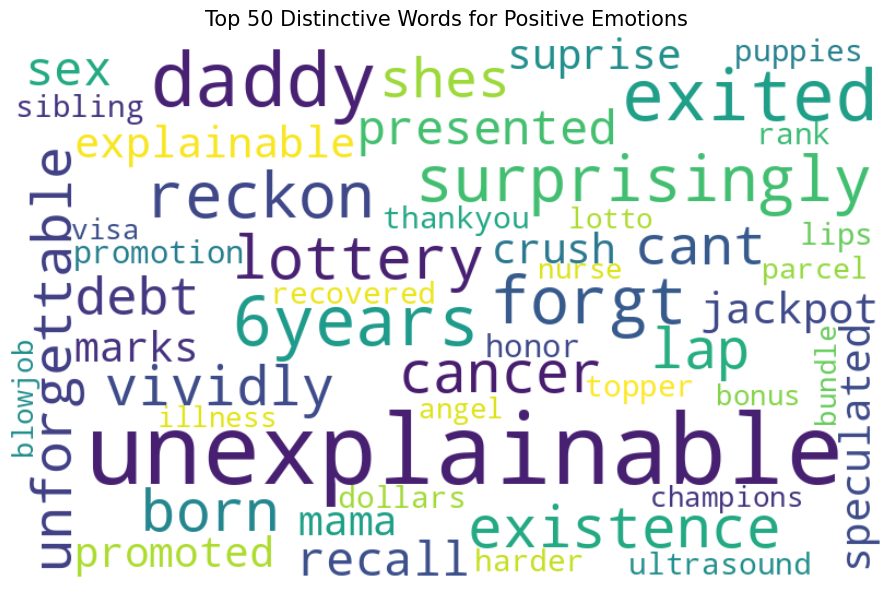


Top 50 distinctive words for Positive Emotions:
unexplainable: 0.060981
daddy: 0.032896
exited: 0.029023
6years: 0.027417
forgt: 0.024935
surprisingly: 0.023219
reckon: 0.022838
lottery: 0.020558
existence: 0.019226
born: 0.018865
cancer: 0.017879
lap: 0.017412
unforgettable: 0.016835
vividly: 0.016818
shes: 0.016518
cant: 0.016508
debt: 0.015503
presented: 0.015442
sex: 0.015382
recall: 0.015062
explainable: 0.014913
jackpot: 0.014721
speculated: 0.014181
crush: 0.014000
promoted: 0.013915
suprise: 0.013830
marks: 0.013609
mama: 0.013443
promotion: 0.013331
honor: 0.013262
ultrasound: 0.013060
sibling: 0.012954
thankyou: 0.012626
topper: 0.012569
dollars: 0.012551
rank: 0.012542
lips: 0.012497
puppies: 0.012418
recovered: 0.012347
harder: 0.012298
parcel: 0.011791
champions: 0.011652
illness: 0.011624
blowjob: 0.011499
lotto: 0.011408
visa: 0.011344
nurse: 0.011259
bonus: 0.011237
bundle: 0.011154
angel: 0.011117


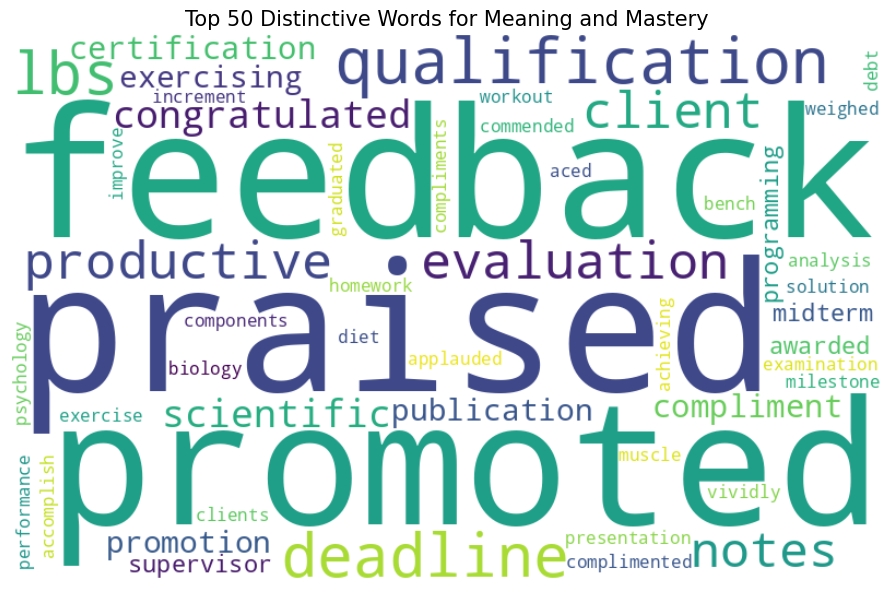


Top 50 distinctive words for Meaning and Mastery:
feedback: 0.041576
praised: 0.041292
promoted: 0.041135
qualification: 0.039724
deadline: 0.035656
lbs: 0.034847
productive: 0.033773
evaluation: 0.033277
client: 0.032536
notes: 0.030614
congratulated: 0.029884
scientific: 0.029367
certification: 0.029320
compliment: 0.028375
promotion: 0.028191
exercising: 0.027683
publication: 0.027394
supervisor: 0.027184
awarded: 0.027127
midterm: 0.026259
programming: 0.026254
presentation: 0.026177
complimented: 0.026095
exercise: 0.026049
commended: 0.025721
milestone: 0.025500
aced: 0.025485
analysis: 0.025120
solution: 0.024917
workout: 0.024667
compliments: 0.024611
bench: 0.024545
weighed: 0.024197
performance: 0.024040
debt: 0.023969
clients: 0.023841
components: 0.023821
biology: 0.023661
applauded: 0.023497
accomplish: 0.023380
homework: 0.023331
increment: 0.023282
achieving: 0.023232
improve: 0.023031
graduated: 0.022953
diet: 0.022935
examination: 0.022828
vividly: 0.022597
psychology

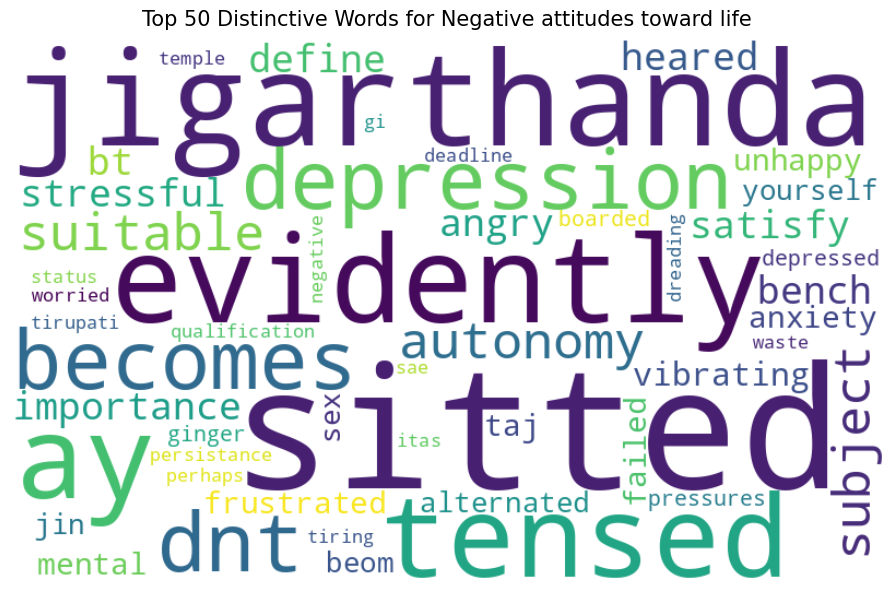


Top 50 distinctive words for Negative attitudes toward life:
sitted: 0.070060
jigarthanda: 0.049884
evidently: 0.042755
ay: 0.039552
tensed: 0.038081
depression: 0.037938
becomes: 0.037690
dnt: 0.037334
autonomy: 0.035397
suitable: 0.035150
subject: 0.034796
importance: 0.034166
angry: 0.033252
satisfy: 0.032784
bt: 0.032038
heared: 0.031693
bench: 0.031294
define: 0.031144
stressful: 0.030496
vibrating: 0.030370
frustrated: 0.029824
taj: 0.028961
mental: 0.028864
unhappy: 0.028553
anxiety: 0.028416
failed: 0.028099
yourself: 0.027605
sex: 0.027194
beom: 0.027150
jin: 0.027150
alternated: 0.027150
depressed: 0.026918
pressures: 0.026902
ginger: 0.026846
boarded: 0.026692
qualification: 0.026377
itas: 0.026344
waste: 0.025971
worried: 0.025867
tiring: 0.025864
gi: 0.025703
tirupati: 0.025518
temple: 0.025311
perhaps: 0.025183
dreading: 0.025030
sae: 0.024935
deadline: 0.024898
persistance: 0.024712
status: 0.024707
negative: 0.024680


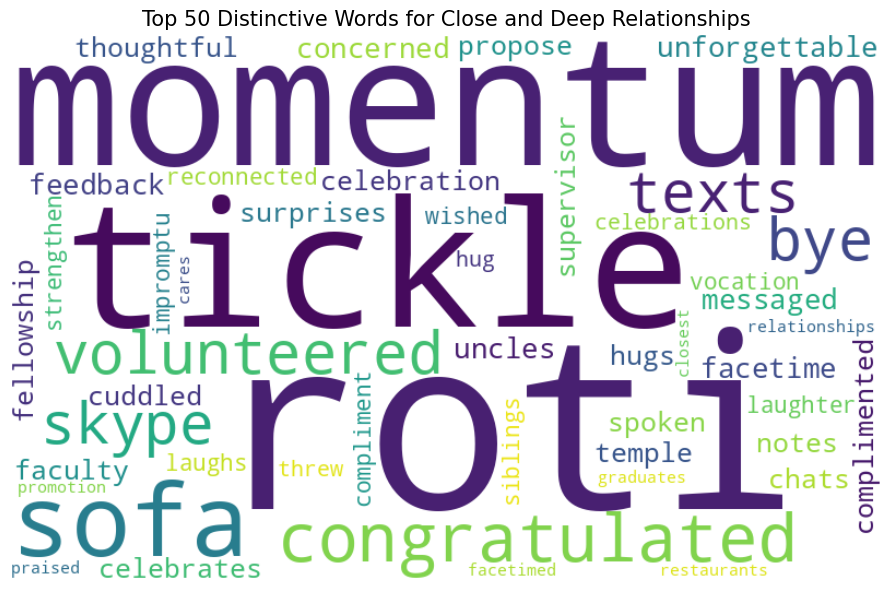


Top 50 distinctive words for Close and Deep Relationships:
roti: 0.078299
momentum: 0.052683
tickle: 0.048743
sofa: 0.029082
congratulated: 0.028730
volunteered: 0.027640
bye: 0.027451
texts: 0.026362
skype: 0.026001
unforgettable: 0.025968
uncles: 0.025896
messaged: 0.025871
feedback: 0.025143
facetime: 0.025034
concerned: 0.024825
hugs: 0.022868
celebration: 0.022729
thoughtful: 0.022701
complimented: 0.022482
cuddled: 0.022142
celebrates: 0.022077
notes: 0.021808
spoken: 0.021518
temple: 0.021081
chats: 0.020793
faculty: 0.020705
fellowship: 0.020638
supervisor: 0.020487
surprises: 0.020442
propose: 0.020363
reconnected: 0.020268
vocation: 0.020009
wished: 0.019996
compliment: 0.019626
strengthen: 0.019598
laughter: 0.019304
impromptu: 0.019157
siblings: 0.019060
laughs: 0.018914
celebrations: 0.018725
hug: 0.018698
threw: 0.018532
relationships: 0.018103
praised: 0.018028
cares: 0.018028
graduates: 0.017998
promotion: 0.017629
closest: 0.017613
restaurants: 0.017609
facetimed: 0.0

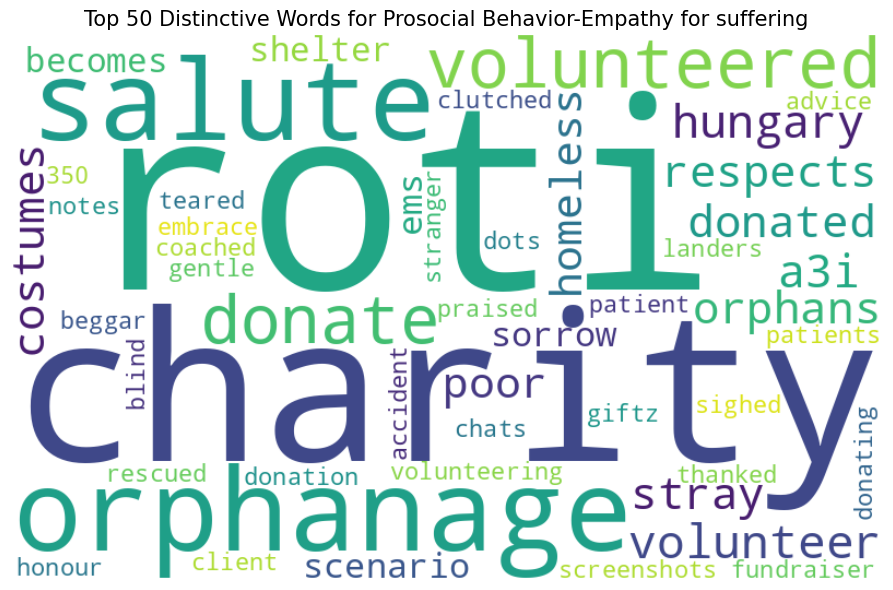


Top 50 distinctive words for Prosocial Behavior-Empathy for suffering:
roti: 0.090498
charity: 0.067244
orphanage: 0.064178
salute: 0.061140
volunteered: 0.055675
donate: 0.052932
volunteer: 0.051299
hungary: 0.049884
a3i: 0.049884
donated: 0.046368
costumes: 0.045888
respects: 0.045124
orphans: 0.044697
stray: 0.043904
homeless: 0.042583
poor: 0.041799
scenario: 0.041501
ems: 0.040483
sorrow: 0.039374
becomes: 0.037015
shelter: 0.036997
volunteering: 0.036493
beggar: 0.035397
screenshots: 0.034516
honour: 0.033599
blind: 0.033249
gentle: 0.033236
chats: 0.032953
notes: 0.032824
advice: 0.031489
landers: 0.031383
teared: 0.030824
giftz: 0.030444
stranger: 0.030082
rescued: 0.029911
dots: 0.029297
client: 0.028167
fundraiser: 0.028033
350: 0.027730
donation: 0.027536
praised: 0.027466
patients: 0.027326
donating: 0.027150
coached: 0.027150
clutched: 0.027141
sighed: 0.027141
thanked: 0.026754
accident: 0.026203
patient: 0.025768
embrace: 0.025763


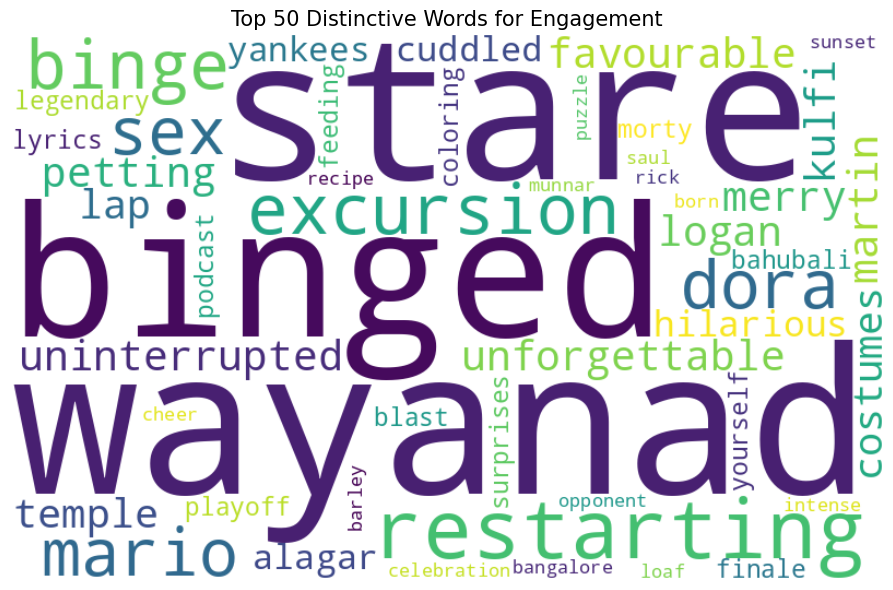


Top 50 distinctive words for Engagement:
wayanad: 0.044697
stare: 0.042836
binged: 0.035397
restarting: 0.032767
excursion: 0.029081
binge: 0.028314
dora: 0.027141
mario: 0.026635
sex: 0.026370
unforgettable: 0.026136
uninterrupted: 0.025507
kulfi: 0.024935
favourable: 0.024639
merry: 0.024294
logan: 0.023834
martin: 0.023821
petting: 0.023562
lap: 0.022776
costumes: 0.022616
temple: 0.022504
hilarious: 0.021046
alagar: 0.020986
cuddled: 0.020747
yankees: 0.020638
legendary: 0.020520
finale: 0.019963
yourself: 0.019891
blast: 0.019847
playoff: 0.019828
morty: 0.019542
lyrics: 0.019110
coloring: 0.019002
podcast: 0.018934
bahubali: 0.018750
feeding: 0.018560
surprises: 0.018552
bangalore: 0.018375
recipe: 0.018368
born: 0.018327
celebration: 0.017941
munnar: 0.017897
rick: 0.017769
cheer: 0.017492
barley: 0.017406
sunset: 0.017347
loaf: 0.017113
saul: 0.016967
puzzle: 0.016958
opponent: 0.016851
intense: 0.016802


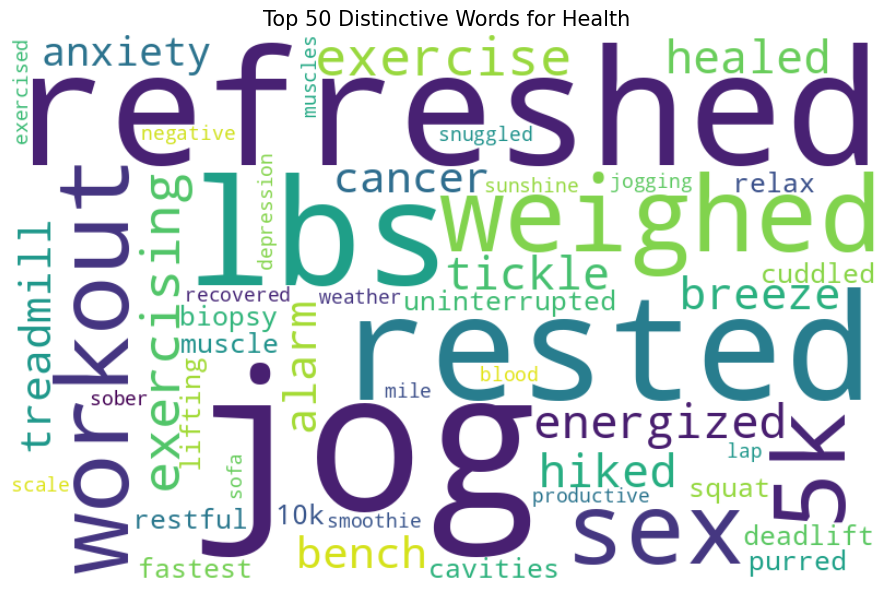


Top 50 distinctive words for Health:
jog: 0.046000
refreshed: 0.043745
lbs: 0.036908
rested: 0.036552
weighed: 0.035674
sex: 0.032619
workout: 0.031913
5k: 0.031720
exercise: 0.029885
exercising: 0.029501
energized: 0.028497
hiked: 0.027322
tickle: 0.026714
healed: 0.026435
alarm: 0.025778
breeze: 0.025754
cancer: 0.025107
bench: 0.024845
treadmill: 0.024790
anxiety: 0.024502
uninterrupted: 0.024173
squat: 0.024043
cuddled: 0.023998
10k: 0.023490
purred: 0.023260
biopsy: 0.023099
cavities: 0.022518
relax: 0.022171
deadlift: 0.022043
restful: 0.021748
muscle: 0.021561
lifting: 0.021450
fastest: 0.021144
productive: 0.020995
lap: 0.020667
exercised: 0.020347
jogging: 0.020231
recovered: 0.020130
sober: 0.019510
smoothie: 0.019479
snuggled: 0.019462
sunshine: 0.019360
weather: 0.019357
blood: 0.019121
muscles: 0.019036
negative: 0.018967
mile: 0.018893
scale: 0.018701
depression: 0.018698
sofa: 0.018547


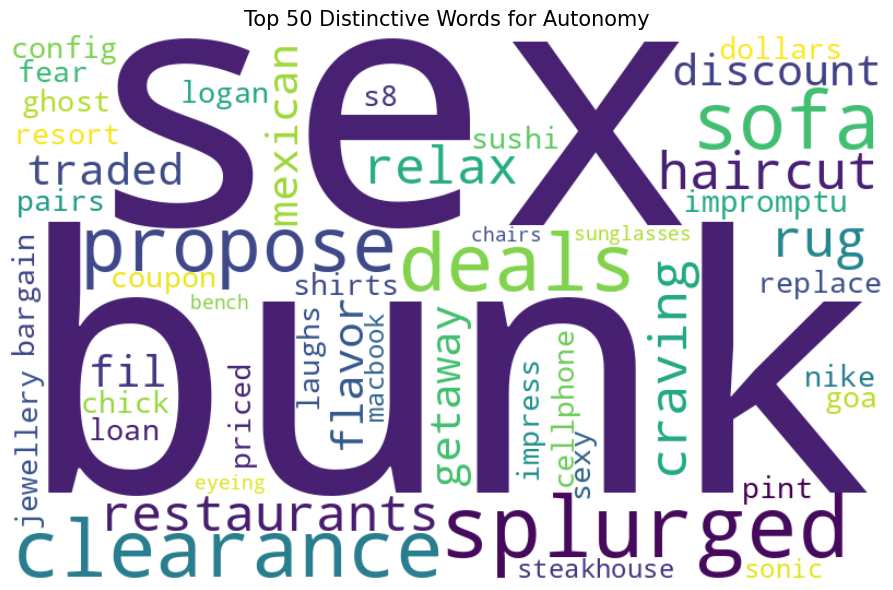


Top 50 distinctive words for Autonomy:
bunk: 0.034193
sex: 0.032393
splurged: 0.022007
clearance: 0.019234
deals: 0.019114
sofa: 0.018547
propose: 0.018037
haircut: 0.017807
craving: 0.017784
rug: 0.017744
restaurants: 0.017609
relax: 0.017542
discount: 0.017287
traded: 0.017217
mexican: 0.016836
flavor: 0.016543
fil: 0.016394
getaway: 0.016318
impromptu: 0.016233
replace: 0.015577
resort: 0.015479
shirts: 0.015479
cellphone: 0.015236
config: 0.015169
bargain: 0.014873
sexy: 0.014805
ghost: 0.014703
laughs: 0.014474
pairs: 0.014375
goa: 0.014359
dollars: 0.014304
loan: 0.014265
s8: 0.014181
nike: 0.014179
logan: 0.014030
coupon: 0.013917
fear: 0.013916
sushi: 0.013912
priced: 0.013901
pint: 0.013684
jewellery: 0.013641
impress: 0.013453
chick: 0.013422
steakhouse: 0.013389
sonic: 0.013321
macbook: 0.013254
sunglasses: 0.013107
chairs: 0.013090
eyeing: 0.012968
bench: 0.012892


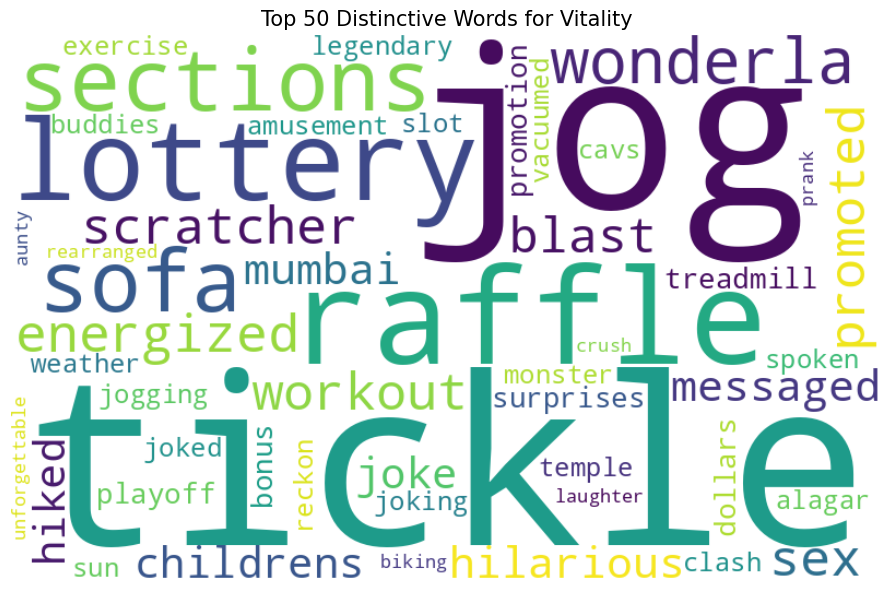


Top 50 distinctive words for Vitality:
tickle: 0.037255
jog: 0.033676
raffle: 0.028462
lottery: 0.023172
sections: 0.022643
sofa: 0.021917
wonderla: 0.021680
energized: 0.021009
scratcher: 0.019849
promoted: 0.019533
workout: 0.019272
sex: 0.018989
blast: 0.017636
hilarious: 0.017554
mumbai: 0.017214
messaged: 0.016982
childrens: 0.016760
hiked: 0.016759
joke: 0.016588
surprises: 0.016548
bonus: 0.016387
playoff: 0.016061
treadmill: 0.015954
promotion: 0.015922
dollars: 0.015910
legendary: 0.015902
temple: 0.015868
jogging: 0.015536
weather: 0.015407
joked: 0.015155
exercise: 0.014994
cavs: 0.014652
slot: 0.014629
amusement: 0.014549
reckon: 0.014512
spoken: 0.014404
alagar: 0.014302
joking: 0.014214
monster: 0.014179
sun: 0.014026
vacuumed: 0.013763
clash: 0.013753
buddies: 0.013591
rearranged: 0.013445
laughter: 0.013386
aunty: 0.013345
unforgettable: 0.013302
crush: 0.013267
prank: 0.013253
biking: 0.013139


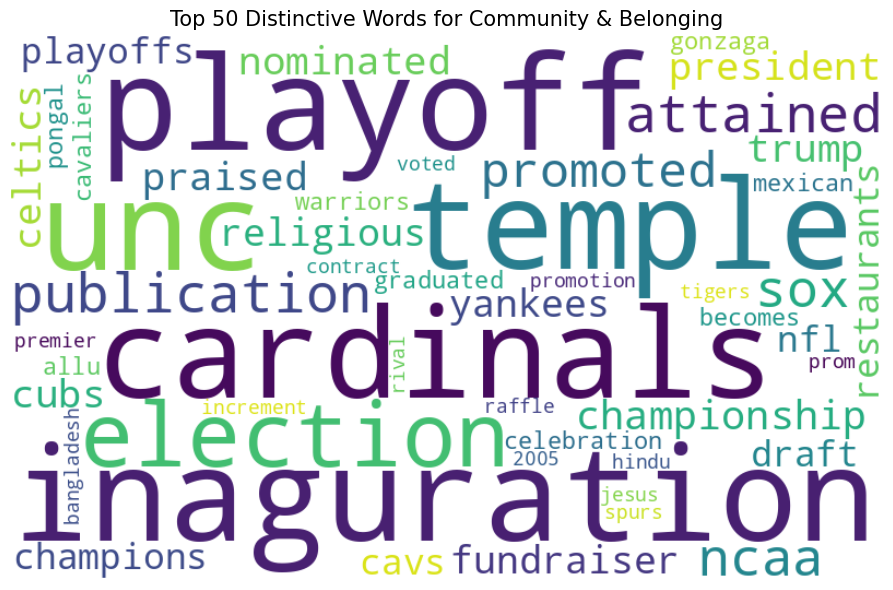


Top 50 distinctive words for Community & Belonging:
inaguration: 0.031383
playoff: 0.031214
cardinals: 0.028813
temple: 0.028106
unc: 0.027781
election: 0.026452
publication: 0.026385
attained: 0.024899
sox: 0.024101
ncaa: 0.023690
promoted: 0.023637
championship: 0.022695
trump: 0.021579
nominated: 0.021280
celtics: 0.020952
cubs: 0.020588
praised: 0.020500
president: 0.020281
religious: 0.020232
fundraiser: 0.020101
yankees: 0.019878
champions: 0.019793
nfl: 0.019734
cavs: 0.019631
playoffs: 0.019614
draft: 0.019226
restaurants: 0.019216
graduated: 0.019136
celebration: 0.018942
pongal: 0.018861
gonzaga: 0.018569
warriors: 0.018473
mexican: 0.018428
becomes: 0.018413
cavaliers: 0.018338
allu: 0.018091
promotion: 0.018026
prom: 0.018009
hindu: 0.017937
voted: 0.017917
2005: 0.017872
raffle: 0.017458
contract: 0.017440
spurs: 0.017077
premier: 0.017061
bangladesh: 0.017056
tigers: 0.016989
jesus: 0.016972
rival: 0.016366
increment: 0.016351


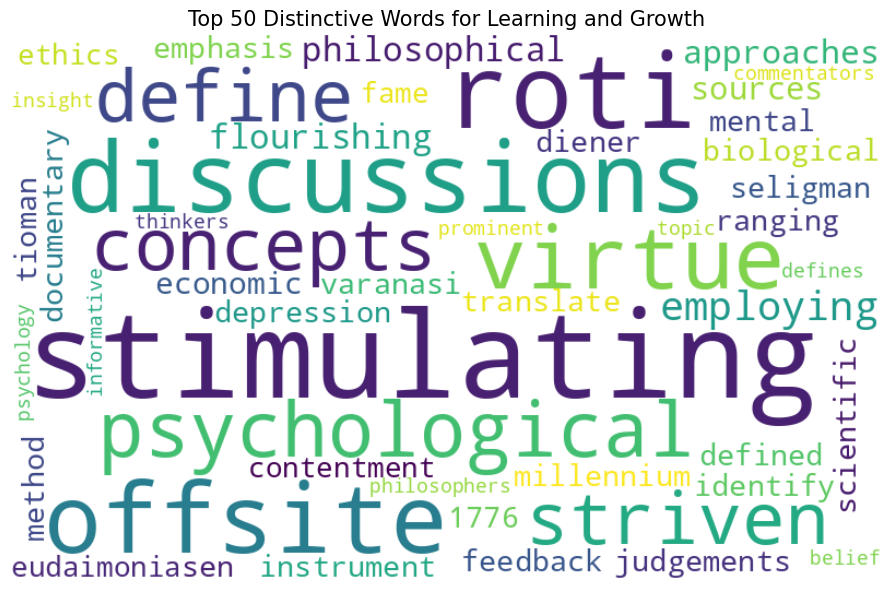


Top 50 distinctive words for Learning and Growth:
stimulating: 0.157327
roti: 0.113794
discussions: 0.099355
offsite: 0.097178
virtue: 0.077105
psychological: 0.060464
define: 0.052906
concepts: 0.052479
striven: 0.052086
employing: 0.050907
philosophical: 0.049790
flourishing: 0.049566
approaches: 0.044897
sources: 0.043273
economic: 0.041450
ranging: 0.039769
feedback: 0.038632
scientific: 0.038280
defined: 0.037785
seligman: 0.037104
method: 0.036965
1776: 0.036878
emphasis: 0.036182
mental: 0.035655
tioman: 0.035397
judgements: 0.035318
depression: 0.035144
biological: 0.034965
millennium: 0.034642
sen: 0.034642
diener: 0.034642
documentary: 0.034516
instrument: 0.033599
translate: 0.033438
varanasi: 0.033415
identify: 0.032773
eudaimonia: 0.031255
contentment: 0.031053
fame: 0.030880
ethics: 0.030880
philosophers: 0.030495
thinkers: 0.030495
prominent: 0.029787
informative: 0.029297
insight: 0.029297
belief: 0.029106
topic: 0.028553
psychology: 0.028445
defines: 0.028121
commenta

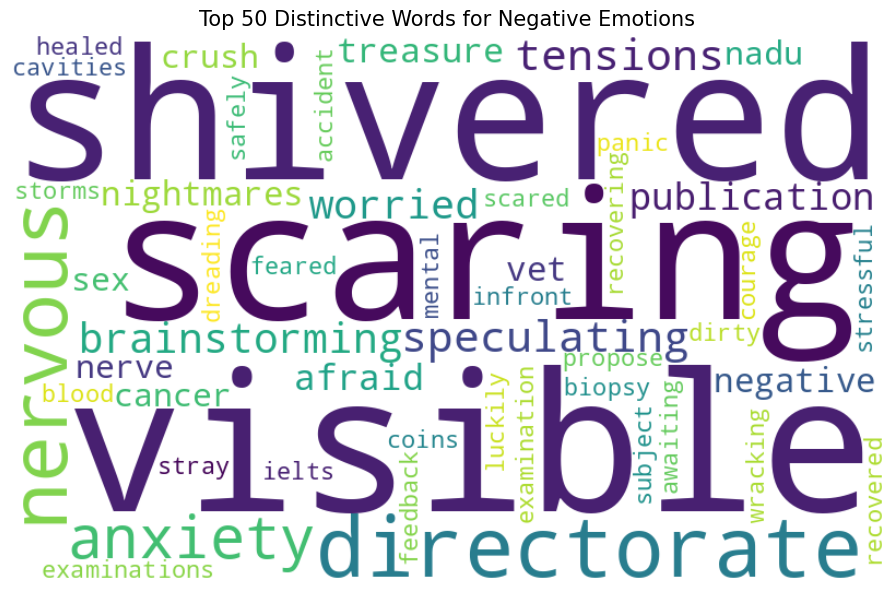


Top 50 distinctive words for Negative Emotions:
visible: 0.053210
shivered: 0.051559
scaring: 0.050393
directorate: 0.046454
nervous: 0.041522
anxiety: 0.041051
speculating: 0.039230
tensions: 0.039230
brainstorming: 0.035714
worried: 0.033690
publication: 0.033333
afraid: 0.031034
treasure: 0.029525
nightmares: 0.028256
negative: 0.028119
vet: 0.028064
sex: 0.026657
nadu: 0.026636
nerve: 0.026556
cancer: 0.026141
crush: 0.025976
examinations: 0.025445
cavities: 0.025108
examination: 0.025093
biopsy: 0.025070
coins: 0.024670
scared: 0.024633
dirty: 0.024431
dreading: 0.024405
ielts: 0.023490
healed: 0.023359
infront: 0.022767
feared: 0.022567
panic: 0.022503
safely: 0.021674
propose: 0.021286
stressful: 0.021183
recovered: 0.021168
awaiting: 0.021129
recovering: 0.020899
subject: 0.020834
storms: 0.020804
luckily: 0.020784
stray: 0.020780
mental: 0.020562
blood: 0.020501
feedback: 0.020367
accident: 0.020336
courage: 0.020306
wracking: 0.020262


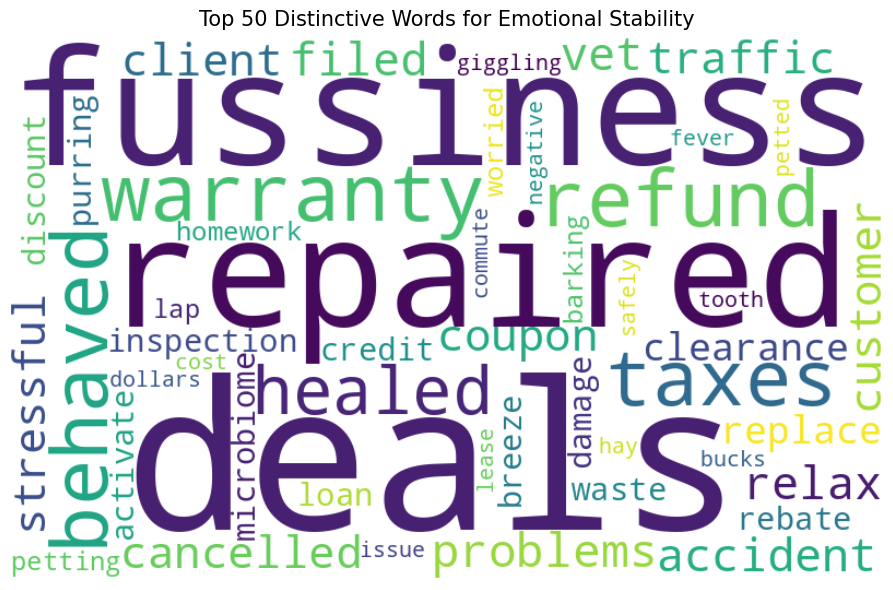


Top 50 distinctive words for Emotional Stability:
deals: 0.024477
fussiness: 0.023660
repaired: 0.021889
warranty: 0.021667
behaved: 0.020183
refund: 0.020068
taxes: 0.019867
healed: 0.019794
problems: 0.019758
vet: 0.019205
relax: 0.019134
accident: 0.018989
filed: 0.018618
cancelled: 0.018070
customer: 0.017819
traffic: 0.017796
client: 0.017428
coupon: 0.017427
stressful: 0.017404
replace: 0.017251
clearance: 0.017250
inspection: 0.017172
rebate: 0.016989
loan: 0.016832
credit: 0.016448
waste: 0.016387
discount: 0.016370
activate: 0.016334
purring: 0.016012
microbiome: 0.015995
damage: 0.015969
breeze: 0.015929
homework: 0.015745
worried: 0.015712
barking: 0.015694
petting: 0.015587
lap: 0.015508
giggling: 0.015500
dollars: 0.015434
negative: 0.015364
bucks: 0.015329
issue: 0.015219
fever: 0.015121
hay: 0.015112
tooth: 0.015110
commute: 0.015002
safely: 0.014995
cost: 0.014975
lease: 0.014874
petted: 0.014833


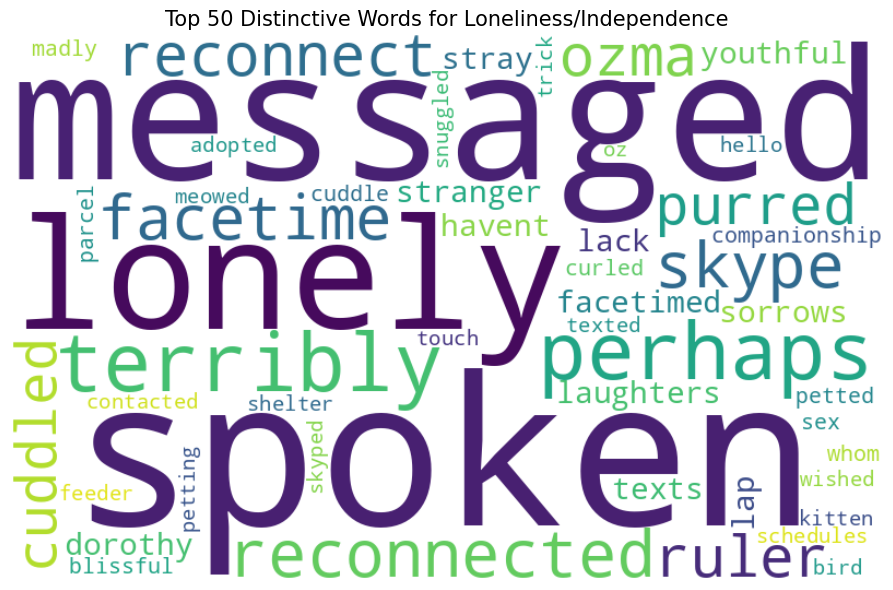


Top 50 distinctive words for Loneliness/Independence:
spoken: 0.031680
messaged: 0.031018
lonely: 0.029421
terribly: 0.029340
perhaps: 0.028618
reconnected: 0.028505
skype: 0.027435
facetime: 0.025555
reconnect: 0.024059
ozma: 0.022905
ruler: 0.022905
purred: 0.022518
cuddled: 0.022383
laughters: 0.021778
youthful: 0.021305
lap: 0.021255
facetimed: 0.020804
stray: 0.020780
dorothy: 0.020469
stranger: 0.019901
lack: 0.019835
texts: 0.019508
sorrows: 0.019016
havent: 0.018741
companionship: 0.018608
whom: 0.018269
sex: 0.017995
petted: 0.017547
curled: 0.017526
blissful: 0.016712
cuddle: 0.016643
parcel: 0.016318
madly: 0.016257
oz: 0.015284
hello: 0.015190
adopted: 0.015179
snuggled: 0.015095
bird: 0.014606
shelter: 0.014529
meowed: 0.014468
petting: 0.014254
texted: 0.014184
wished: 0.014153
touch: 0.014134
feeder: 0.014122
trick: 0.014073
contacted: 0.014055
kitten: 0.013880
schedules: 0.013693
skyped: 0.013638


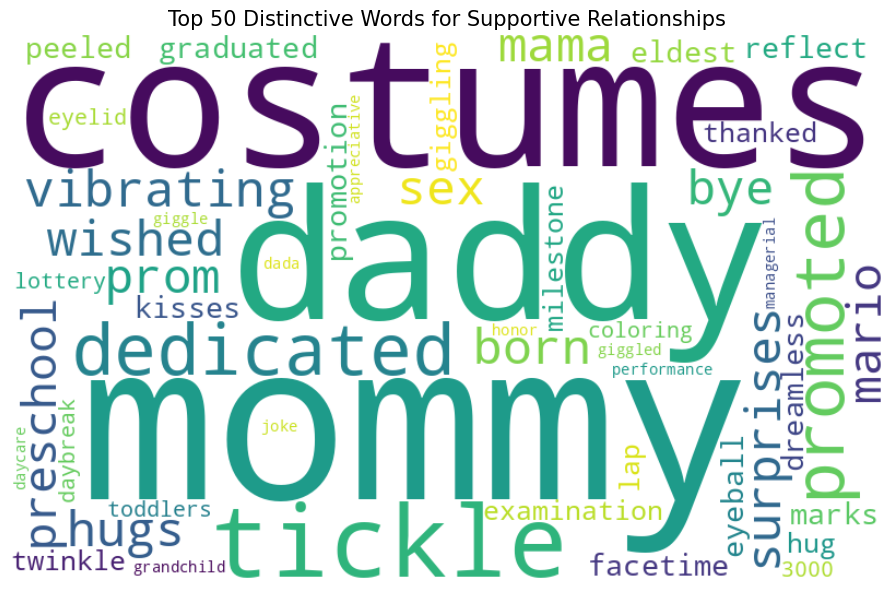


Top 50 distinctive words for Supportive Relationships:
mommy: 0.035263
costumes: 0.028121
daddy: 0.027894
tickle: 0.024430
dedicated: 0.024079
promoted: 0.023107
vibrating: 0.022865
surprises: 0.021854
wished: 0.021586
born: 0.021552
sex: 0.021288
hugs: 0.021097
prom: 0.020625
bye: 0.020162
mama: 0.020042
preschool: 0.019537
mario: 0.019099
graduated: 0.018714
reflect: 0.018437
facetime: 0.018324
promotion: 0.018271
eldest: 0.018256
peeled: 0.017998
kisses: 0.017949
dreamless: 0.017777
eyeball: 0.017777
marks: 0.017413
examination: 0.017300
giggling: 0.017097
twinkle: 0.017056
thanked: 0.016930
milestone: 0.016874
hug: 0.016751
lap: 0.016741
coloring: 0.016474
toddlers: 0.016405
3000: 0.015983
daybreak: 0.015955
eyelid: 0.015955
lottery: 0.015493
performance: 0.015373
joke: 0.015300
grandchild: 0.015284
managerial: 0.015278
honor: 0.015206
giggled: 0.015143
daycare: 0.015117
dada: 0.015112
giggle: 0.015011
appreciative: 0.014959


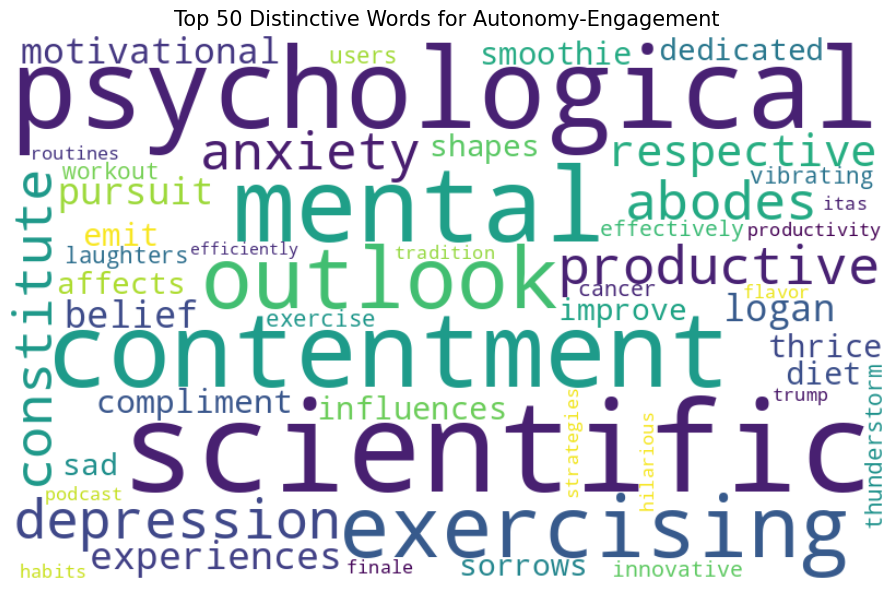


Top 50 distinctive words for Autonomy-Engagement:
scientific: 0.035743
psychological: 0.034869
mental: 0.030172
contentment: 0.030063
exercising: 0.025690
outlook: 0.025653
depression: 0.023249
productive: 0.022911
abodes: 0.022643
constitute: 0.022643
anxiety: 0.022576
respective: 0.022450
experiences: 0.022370
belief: 0.021539
pursuit: 0.021539
logan: 0.021375
motivational: 0.020639
compliment: 0.019626
smoothie: 0.019479
diet: 0.019136
emit: 0.019070
thrice: 0.019070
influences: 0.018876
dedicated: 0.018798
affects: 0.018608
sad: 0.018405
sorrows: 0.018021
shapes: 0.017998
improve: 0.017985
laughters: 0.017641
thunderstorm: 0.017400
users: 0.017368
workout: 0.017358
vibrating: 0.017188
exercise: 0.017172
effectively: 0.016684
innovative: 0.016684
cancer: 0.016671
productivity: 0.016545
flavor: 0.016543
podcast: 0.016313
tradition: 0.016244
routines: 0.016230
habits: 0.016168
finale: 0.016150
hilarious: 0.016105
trump: 0.015905
itas: 0.015614
strategies: 0.015534
efficiently: 0.0155

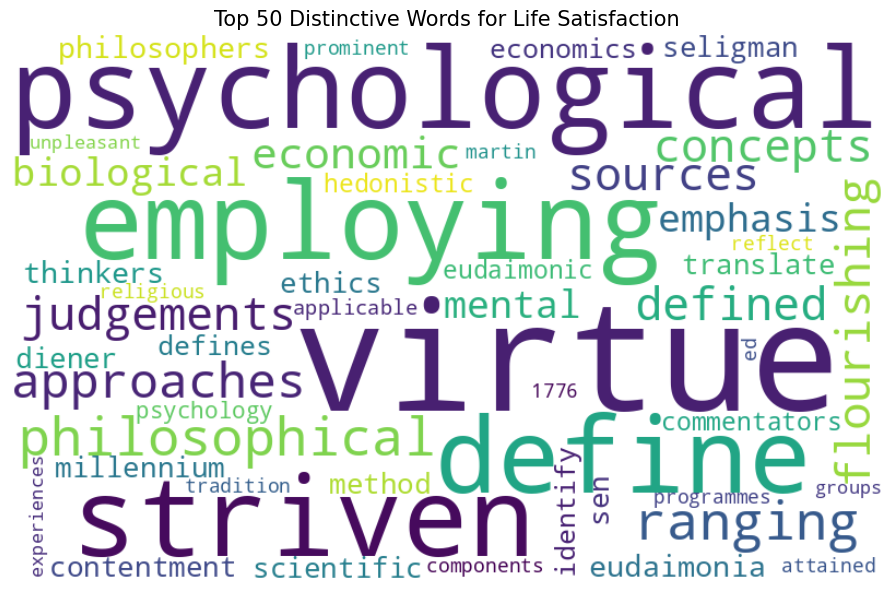


Top 50 distinctive words for Life Satisfaction:
virtue: 0.110283
psychological: 0.091195
striven: 0.090072
employing: 0.087146
define: 0.082107
philosophical: 0.079592
ranging: 0.078140
approaches: 0.077640
flourishing: 0.072405
concepts: 0.069906
judgements: 0.069610
defined: 0.069394
sources: 0.068950
economic: 0.062145
biological: 0.060465
mental: 0.057183
emphasis: 0.057041
philosophers: 0.056662
thinkers: 0.056662
eudaimonia: 0.054899
translate: 0.054562
seligman: 0.054107
ethics: 0.053908
method: 0.053493
millennium: 0.053305
sen: 0.053305
diener: 0.053305
scientific: 0.053049
contentment: 0.051920
identify: 0.049328
economics: 0.047578
defines: 0.046687
commentators: 0.046687
hedonistic: 0.046687
eudaimonic: 0.046687
psychology: 0.043585
applicable: 0.041752
components: 0.039548
attained: 0.039273
martin: 0.039216
tradition: 0.039036
programmes: 0.039004
prominent: 0.038746
religious: 0.038144
1776: 0.036878
ed: 0.035138
reflect: 0.034172
unpleasant: 0.031408
experiences: 0.031

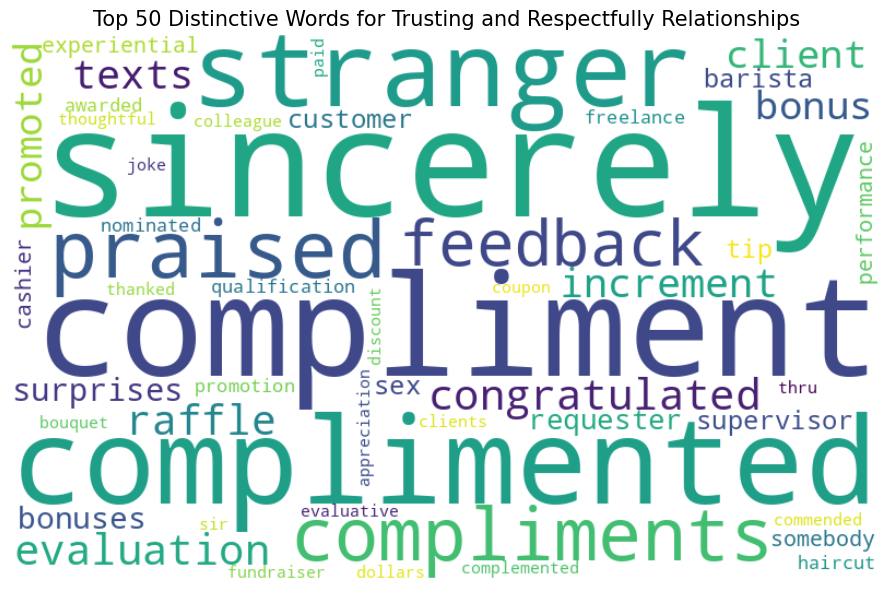


Top 50 distinctive words for Trusting and Respectfully Relationships:
sincerely: 0.048828
compliment: 0.041772
complimented: 0.040686
stranger: 0.039344
praised: 0.038884
compliments: 0.037449
feedback: 0.036008
congratulated: 0.031789
evaluation: 0.031418
raffle: 0.029930
texts: 0.027921
increment: 0.027713
client: 0.026949
promoted: 0.026494
bonus: 0.025947
surprises: 0.024907
bonuses: 0.023920
requester: 0.023868
supervisor: 0.023282
tip: 0.023091
sex: 0.022979
barista: 0.022838
customer: 0.022016
experiential: 0.021958
somebody: 0.021654
cashier: 0.021602
performance: 0.021433
qualification: 0.020440
freelance: 0.019399
awarded: 0.019168
promotion: 0.019124
nominated: 0.018804
haircut: 0.018724
complemented: 0.018636
bouquet: 0.018469
evaluative: 0.018378
thru: 0.018323
coupon: 0.018256
sir: 0.018065
thanked: 0.017364
joke: 0.016852
dollars: 0.016791
paid: 0.016768
thoughtful: 0.016533
appreciation: 0.016526
commended: 0.016344
fundraiser: 0.016166
discount: 0.015899
clients: 0.01

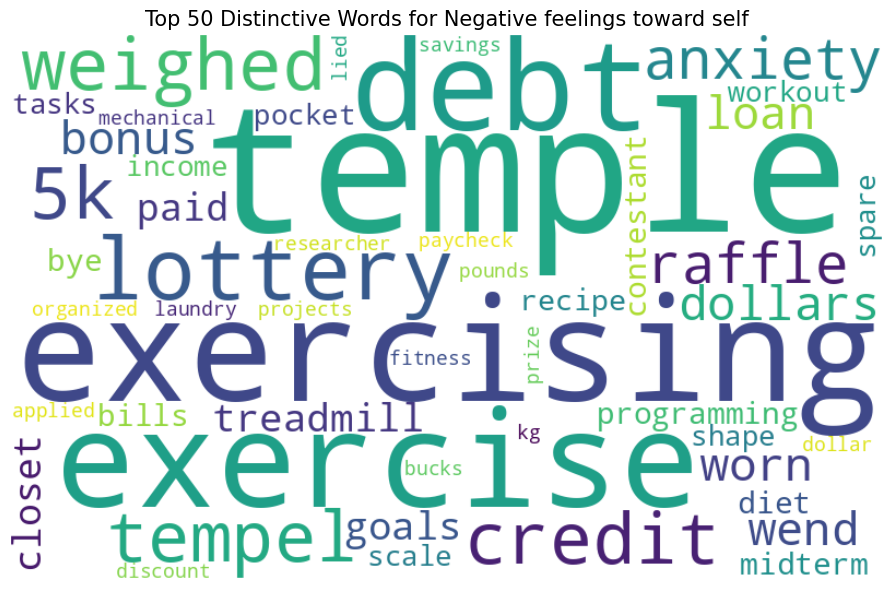


Top 50 distinctive words for Negative feelings toward self:
temple: 0.024652
exercising: 0.022151
exercise: 0.019147
debt: 0.018992
lottery: 0.018445
weighed: 0.018060
5k: 0.017942
credit: 0.017625
tempel: 0.017109
anxiety: 0.016083
raffle: 0.015353
dollars: 0.015206
worn: 0.014858
wend: 0.014309
loan: 0.014265
bonus: 0.014144
treadmill: 0.014030
goals: 0.013809
closet: 0.013412
paid: 0.013117
programming: 0.013060
bills: 0.012842
bye: 0.012812
diet: 0.012787
contestant: 0.012626
midterm: 0.012428
recipe: 0.011937
income: 0.011456
scale: 0.011409
pocket: 0.011210
spare: 0.011054
tasks: 0.011038
shape: 0.010858
workout: 0.010721
organized: 0.010618
savings: 0.010497
bucks: 0.010261
laundry: 0.010087
kg: 0.010084
paycheck: 0.010001
projects: 0.009958
pounds: 0.009900
mechanical: 0.009759
applied: 0.009751
lied: 0.009501
researcher: 0.009449
fitness: 0.009427
dollar: 0.009400
discount: 0.009174
prize: 0.009122


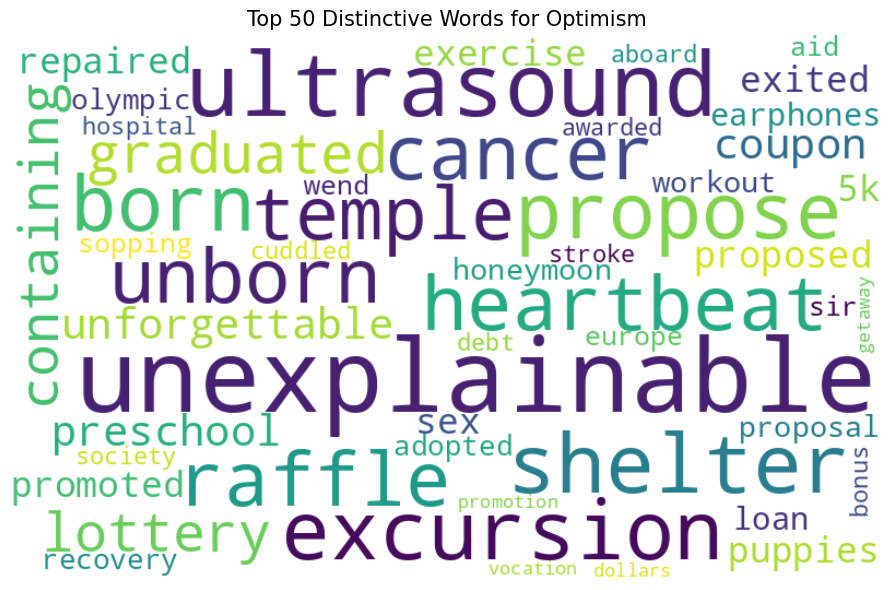


Top 50 distinctive words for Optimism:
unexplainable: 0.038112
ultrasound: 0.027389
excursion: 0.023104
shelter: 0.022865
propose: 0.020363
born: 0.019598
cancer: 0.019300
unborn: 0.019292
heartbeat: 0.019145
raffle: 0.019090
temple: 0.018752
graduated: 0.018563
containing: 0.018058
lottery: 0.017788
unforgettable: 0.017764
preschool: 0.017761
coupon: 0.017427
proposed: 0.017263
repaired: 0.016476
exited: 0.016203
promoted: 0.015822
exercise: 0.015822
5k: 0.015779
sex: 0.015382
puppies: 0.015027
earphones: 0.014873
loan: 0.014735
honeymoon: 0.014619
proposal: 0.014359
workout: 0.014262
recovery: 0.014245
olympic: 0.014179
adopted: 0.014158
sopping: 0.013807
aid: 0.013725
europe: 0.013697
wend: 0.013689
sir: 0.013483
hospital: 0.013388
aboard: 0.013254
debt: 0.013136
awarded: 0.013125
society: 0.013072
stroke: 0.013027
bonus: 0.012961
cuddled: 0.012916
promotion: 0.012906
getaway: 0.012893
dollars: 0.012891
vocation: 0.012871


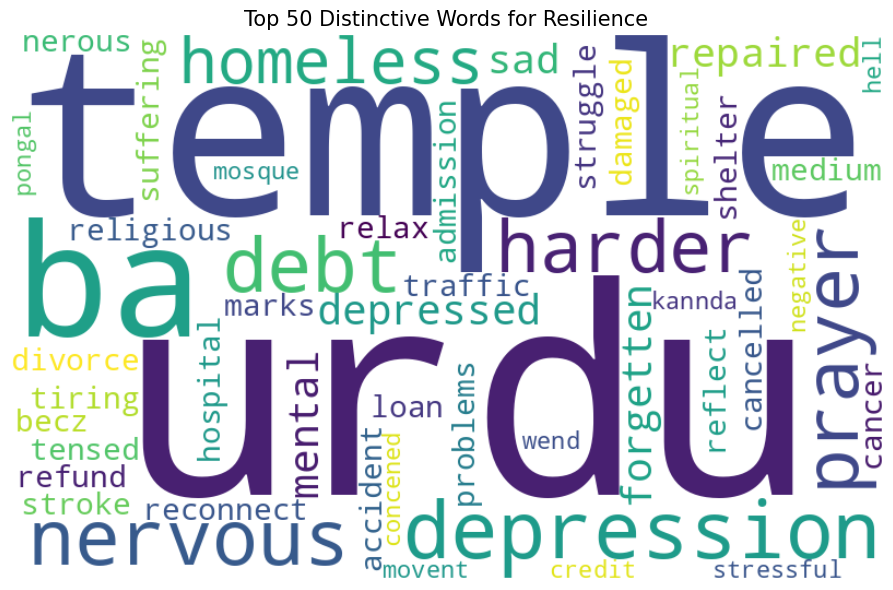


Top 50 distinctive words for Resilience:
urdu: 0.030904
temple: 0.030762
ba: 0.030255
depression: 0.024874
nervous: 0.022894
debt: 0.022157
prayer: 0.021937
harder: 0.021730
homeless: 0.020772
depressed: 0.020687
mental: 0.020562
forgetten: 0.020323
sad: 0.019787
repaired: 0.019470
religious: 0.019174
loan: 0.019166
reconnect: 0.019114
cancer: 0.018866
tensed: 0.018768
cancelled: 0.018680
reflect: 0.018437
stroke: 0.018286
suffering: 0.018237
marks: 0.018125
accident: 0.017867
tiring: 0.017853
traffic: 0.017796
hospital: 0.017609
becz: 0.017388
divorce: 0.017330
refund: 0.017099
struggle: 0.017079
problems: 0.017042
admission: 0.017010
damaged: 0.016905
nerous: 0.016706
medium: 0.016575
shelter: 0.016521
relax: 0.016412
stressful: 0.016268
mosque: 0.016233
spiritual: 0.016199
kannda: 0.015995
credit: 0.015870
hell: 0.015613
negative: 0.015364
wend: 0.015346
pongal: 0.015278
movent: 0.015278
concened: 0.015278
['millennium', 'topper', 'jin', 'dnt', 'bahubali', 'sonic', 'bonus', 'bangal

In [22]:
# First, calculate dominant factors for your dataframe
factor_columns = [col for col in factor_df.columns if col in factor_label_map.values()]
factors_only_df = factor_df[factor_columns]

# Get dominant factor index (highest score per sentence)
factor_df['dominant_factor'] = factors_only_df.idxmax(axis=1)
factor_df['factor_strength'] = factors_only_df.max(axis=1)

# Run the analysis with balanced word importance calculation
freq_dict, importance_dict, used_words = analyze_factor_word_importance(
    factor_df, 
    text_column='cleaned_hm',
    factor_column='dominant_factor',
    strength_column='factor_strength',
    strength_threshold=0.5,
    factors_to_visualize = [
        "Positive Emotions",
        "Meaning and Mastery",
        "Negative attitudes toward life",
        "Close and Deep Relationships",
        "Prosocial Behavior-Empathy for suffering",
        "Engagement",
        "Health",
        "Autonomy",
        "Vitality",
        "Community & Belonging",
        "Learning and Growth",
        "Negative Emotions",
        "Emotional Stability",
        "Loneliness/Independence",
        "Supportive Relationships",
        "Autonomy-Engagement",
        "Life Satisfaction",
        "Trusting and Respectfully Relationships",
        "Negative feelings toward self",
        "Optimism",
        "Resilience"
    ],
    top_n=50,
    stopwords=universal_stopwords,
    min_term_freq=3,       # Words must appear at least 3 times in a factor
    sublinear_tf=True,     # Use logarithmic scaling for term frequency
    idf_smoothing=1.0      # Smoothing factor for IDF calculation
)


print(used_words)

In [16]:
# Count the number of moments per dominant factor
factor_counts = factor_df['dominant_factor'].value_counts()

# Print the count
print("Number of moments per dominant factor:")
print(factor_counts)



Number of moments per dominant factor:
dominant_factor
Close and Deep Relationships                9746
Meaning and Mastery                         8413
Health                                      6998
Autonomy                                    6027
Learning and Growth                         5417
Engagement                                  5350
Negative attitudes toward life              5316
Supportive Relationships                    5120
Community & Belonging                       5066
Loneliness/Independence                     4792
Trusting and Respectfully Relationships     4605
Prosocial Behavior-Empathy for suffering    4523
Emotional Stability                         4303
Optimism                                    4090
Life Satisfaction                           3961
Vitality                                    3841
Negative Emotions                           3770
Resilience                                  3220
Autonomy-Engagement                         3104
Positive Emoti